&copy; Bedzyk Research Group 2020, Northwestern University

<div class="alert alert-block alert-warning">
To start this project, in the top menu bar click $\text{Cell}\to \text{ Run All}$. Then, scroll back up to the top of this document.
</div>

In [25]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


<div class="alert alert-block alert-warning">
Raw code is hidden by default for the entire notebook. You can toggle on/off the raw code for this entire notebook by clicking the button above. More importantly, raw code for individual cells can be shown/hidden by using the message/button: <img src="images/show_hide_button.png"/> Hiding the code is mainly for visual purposes and may be useful if you would like a hard copy (i.e. pdf) of this document. However, there are also instances where you will need to show the code cell so you can input different parameters. This button will show up repeatedly throughout this document. Try showing and hiding the code in the cell block below as an example.
</div>

In [26]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

In [27]:
# Strings I have to define for pro vs manual control and for different samples:

sample = ["Fe2O3","Pt"]

sample_string = ["hematite", "platinum"]

sample_size = ["10","20","50"] 

# Jupyter Notebook Introduction

Jupyter Notebook is a an open source web application/user interface that allows users to create and share documents containing code, equations, visualizations, and narrative text by using a combination of different programming languages. In this Jupyter Notebook (*XRR.ipynb*), we will be using **Python 3** for all analysis purposes (in the top right corner of this page, you will see the tag Python 3 which tells you the programming language of the notebook). The most important concept of Jupyter Notebooks is the concept of a **cell block**. Clicking on a block of text or code will highlight (in blue in this case) the current cell block you are viewing. Click on this block of text. In the menu bar at the top of this document, you will see a drop down menu: <img src="images/markdown_dropdown.png"/> 

**Markdown** is referring the type of this cell block. Markdown is a text formatting language supported in Jupyter Notebook. By *double clicking* on the text you are reading right now, you will see the Markdown version of the cell block. You will see the other types of supported cell blocks by clicking the drop down menu. For example, "Code" is another type of cell block you will be seeing in this document and they all contain snippets of Python 3 code. 

To run code of a particular cell block, click into the cell and either click the run button above: 

<img src="images/run_jupyter.png"/>

or click "Shift+Enter" on your keyboard. Running a cell will also allow you to exit the "code view" version of a Markdown cell block. 

That is all you will need to know for this laboratory exercise. Have fun and we welcome any positive/negative feedback!

>**NOTE:** *Do not worry if you do not know Python or Markdown as there is no coding necessary for completing this project. In fact, most code cells can be left hidden for the entire exercise and you never even have to see code!*

# *Before You Begin...*
Please verify what SmartLab model you are using. In the cell block below, please click on the machine and software that corresponds to your SmartLab. You will see a screen shot of the software for the machine you click on.

After selecting, navigate into the cell block below the screen shot. Click $\text{Cell}\to \text{ Run All Below}$ to update the instructions tailored to your machine.

Most of the lab will be performed within the *Pro/Manual Control* window of the Smartlab softwares (circled in red in the screenshots).

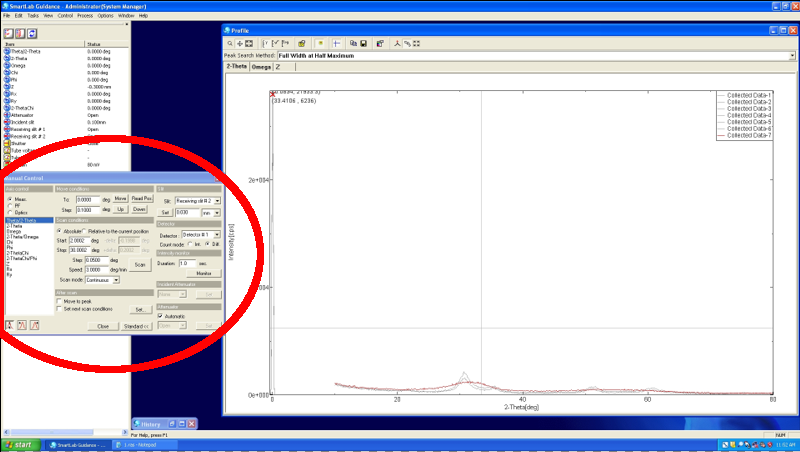

In [28]:
display(tag)

machine_toggle_1 = widgets.ToggleButton(
    value=False,
)

machine_button_1 = widgets.Button(
    description='Smartlab Gen 1, Guidance',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

machine_toggle_2 = widgets.ToggleButton(
    value=False,
)

machine_button_2 = widgets.Button(
    description='Smartlab Gen 2, Studio II',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

#defining what the button will do on clicking: output a screenshot of each software
def on_button_clicked_machine_1(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = True
    machine_toggle_2.value = False
    display(Image(filename='images/guidance_3.png'))   
def on_button_clicked_machine_2(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = False
    machine_toggle_2.value = True
    display(Image(filename='images/studio_II_3.png'))
    

machine_button_1.on_click(on_button_clicked_machine_1)
machine_button_2.on_click(on_button_clicked_machine_2)
        
#displaying the buttons for the two types of machines
machine_button_layout = widgets.Layout(align_items='center')
machines = widgets.VBox(children=[machine_button_1,machine_button_2],layout=machine_button_layout)
display(machines)

# Click $\text{Cell}\to \text{Run  All  Below}$ when inside of this cell after selecting your instrument.

<br/><br/>
<div align="center">
<font size="18" color="#990000"><b> Thin Film X-ray Reflectivity (XRR) </b></font>
</div>

# Overview of the technique

X-Ray Reflectivity (XRR) measures the fraction of the incident X-ray beam intensity that is specularly reflected from a mirror-like surface with or without thin film coatings. Because the index of refraction, n = 1 - $\delta$ - i $\beta$ , is slightly less than unity at X-ray frequencies, Snell's Law predicts total external reflection from a mirror when the incident angle is less than the critical angle, $\theta_c$ = (2$\delta$)$^1$$^/$$^2$.   (Typically 0.1° < $\theta_c$ < 0.5° .) When the incident angle $\theta$ >> $\theta_c$  Fresnel theory predicts that the reflectivity (R) drops off  strongly as $R_F$ = (2$\theta$/$\theta_c$)$^-$$^4$  and the X-ray waves reflected from the parallel interfaces of a film coated mirror interfere with each other; causing the tail of the reflectivity curve to oscillate as the incident angle is increased. **Fig. 1** shows the information that can be obtained from a XRR measurement both for one and two interfaces. The oscillation period is inversely proportional to the film thickness. The oscillation amplitude senses the density contrast between the film and substrate.  The  mirror surface rms roughness  $\sigma$ causes the reflectivity tail to be damped, as described by R = $R_F$exp[-(Q$\sigma)^2$]. Where the scattering vector magnitude Q = 4$\pi $ Sin$\theta$ / $\lambda$.

<img src="images/xrr.png" />

>For further details about XRR and other surface sensitive X-ray techniques please refer to the following website:  
>https://www-ssrl.slac.stanford.edu/conferences/workshops/xrs2016/documents/hgs_sxr2016_sxrd.pdf

# XRR Lab Description
In this lab, you will be analyzing X-ray reflectivity for a thin film of $\alpha\text{-Fe}_2\text{O}_3$ (hematite) or $\text{Pt}$ (platinum) epitaxially grown by pulsed laser deposition (PLD) on $\alpha\text{-Al}_2\text{O}_3$ $(001)$ ($c$-face sapphire) substrate. $\alpha\text{-Fe}_2\text{O}_3$ films are potentially of interest for water photooxidation and renewable energy (<a href="images/Kay_et_al.Fe2O3_photooxidation.JACS.2006.pdf">Kay, Cesar and Gratzel, JACS,2006</a>).

Here, we measure the reflectivity of the substrate/film which is caused by the difference in their electron density. This lab consists of the following steps:


1. **Getting Started in Smartlab**
2. **Sample Alignment** 
3. **Performing X-ray Reflectivity**
4. **Finishing Measurement**


<div class="alert alert-block alert-danger">
While these instructions are for a particular thin film sample and a particular SmartLab diffractometer, you should be able to use them for guidance for XRR measurements of other types of thin film samples and other diffractometers. 
</div>

## 1. Getting Started in Smartlab (Guidance / Studio II)

Here you will open Smartlab Guidance or Smartlab Studio II software and turn on the X-Ray Generator. Depending on the Smartlab you are working on, you will be using Guidance (Smartlab Gen 1) or Studio II software (Smartlab Gen 2). You will be doing your measurements in the Pro/Manual Control mode which allows you to be free to do any movement on any axis of the diffractometer. This is a preferred choice to fully understand what you are doing and is a great way to introduce the use of the diffractometer. Smartlab allows the use of routines/flows which can be very beneficial for streamlining the use of the equipment.

>You can check out these two videos about the Rigaku SmartLab system if you are interested in learning more:

><div><em><span style="text-align: left; color: #ff0000; text-transform: none; text-indent: 0px; letter-spacing: normal; font-size: 16px; font-variant: normal; font-weight: 400; text-decoration: none; word-spacing: 0px; display: inline; white-space: normal; orphans: 2; float: none; background-color: #ffffff;"><span style="background-color: #ffffff;">About the equipment:   <a href="https://www.youtube.com/watch?v=wAB9VHzOA1Q" target="_blank" rel="noopener">https://www.youtube.com/watch?v=wAB9VHzOA1Q</a></span></span></em></div>
><div><em><span style="text-align: left; color: #ff0000; text-transform: none; text-indent: 0px; letter-spacing: normal; font-size: 16px; font-variant: normal; font-weight: 400; text-decoration: none; word-spacing: 0px; display: inline; white-space: normal; orphans: 2; float: none; background-color: #ffffff;"><span style="background-color: #ffffff;">About the applications: <a href="https://www.youtube.com/watch?v=Kq9jthHvVxI" target="_blank" rel="noopener">https://www.youtube.com/watch?v=Kq9jthHvVxI</a></span></span></em></div>
<div> </div>


### Follow the instructions and put a check mark in each step as you advance. These steps are to set up the Smartlab software and initial conditions for the experiment.

This experiment will primarily be performed in the *Manual Control* window in Guidance and *Pro Control* window in Studio II.

In [39]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_getting_started = ['Open XG Control (XG Control is located in the $\\text{Control}$ tab on SmartLab Guidance).',
            'Turn on the X-Ray tube and wait',
            'Set the voltage to $45$ kV. Click on $\\text{SET}$ and wait',
            'After the voltage has been set, set the current to $160$ mA. Click on $\\text{SET}$ and wait',
            'Close XG Control and open Pro/Manual Control in the Home Tab',
            'Look at the H/W Status Window in the left part of the screen. Make sure the following motors are set to zero in the H/W Status Tab: 2$\\theta$, $\omega$, 2$\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro Control, type zero in the Move Tab and click on Move. In addition, double-check that the voltage is $45$ kV and current is $160$ mA.']
checkbox_array_getting_started = []
for step in step_list_getting_started:
    step_index = str(step_list_getting_started.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_getting_started.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb1 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_getting_started:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_getting_started.index(checkbox)+1))
            pb1.button_style='danger'
    if steps_completed == len(checkbox_array_getting_started):
        print("You finished Getting Started with Smartlab. Please, continue to Sample Alignment. Nice job!")
        pb1.button_style='success'
        
pb1.on_click(on_button_clicked)
display(pb1)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Turn on the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Set the volt…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='After the vo…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Close XG Con…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Look at the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

### Setting Up Your Own Directory for Lab Projects

We have a facility file server where you will save/access all of your experimental data. All data that is generated from lab computers should be saved on the network drive labeled “mrc_xrayfac”, in the following directory: “netID folders/[your net ID]", where you would replace your own Northwestern net ID. To be more explicit, you should save your data in the following directory:

$\text{This PC} \to \text{mrc_xrayfac (\\\\resfiles.northwestern.edu)(Z:)} \to \text{netID folders} \to \text{[your_net_ID]}$


### Follow the instructions and put a check mark in each step as you advance. These steps are to set up your own directory in the X-ray facility server for the XRR experiment.

In [40]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_directory = ['On the lab computer, navigate to the $\\text{netID folders}$ directory following the flow chart above.',
                      'Go to or Create a new folder within this directory with the folder name as your own net ID',
                      'Go to or Create a new folder named $\\text{461}$ within your net ID folder.',
                      'Within $\\text{461}$, create a folder named  $\\text{PLD_[film_size]_[sample]_[substrate]}$ (e.g. $\\text{PLD_50nm_Fe2O3_Al2O3}$ for 50nm hematite film on saphhire). <i><b>NOTE:</b> PLD refers to pulsed laser deposition, the technique used to grow the film.</i>',
                      'Finally, within this new folder, create a new folder titled $\\text{XRR_lab}$. This is where you will save all of your data from this exercize.']
checkbox_array_directory= []
for step in step_list_directory:
    step_index = str(step_list_directory.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_directory.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb5 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_directory:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_directory.index(checkbox)+1))
            pb5.button_style='danger'
    if steps_completed == len(checkbox_array_directory):
        print("Great work. Move on to Sample Alignment.")
        pb5.button_style='success'
        
pb5.on_click(on_button_clicked)
display(pb5)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='On the lab c…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Go to or Cre…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Go to or Cre…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Within $\\te…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Finally, wit…

Button(button_style='info', description='Finish!', style=ButtonStyle())

### Accessing X-ray Lab Server

Click on the link below and follow the steps for accessing the X-ray lab server and your data files from your personal computer. The server name is **mrc_xrayfac**.
>https://kb.northwestern.edu/page.php?id=70525

##### Prior to  sample alignment, the optics, sample goniometer, and detector slits have been prealigned by the XRD facility staff.  You can eventually learn how to do this alignment on your own with a set of automated procedures that are part of the SmartLab software control system. 

## 2. Sample Alignment (Thin Film)

 The XRD staff has mounted your sample in the center of the sample circular plate. 
Starting at $\omega$ = 2$\theta$ =0, you will rotate ($R_y$) and translate (Z) of the sample until the sample surface is parallel to the straight through beam (STB) and cuts the STB in half.  

Please refer to  **Fig. 2** below to become familiar with the components of the diffractometer. The $\textbf{incident beam arm}$, which is carried by the horizontal $\omega$ rotation axis, starts with a 50 $\mu$m x 8 mm horizontal line source from the Cu rotating anode, followed by: a parabolic multilayer mirror set to pass Cu K$\alpha$ X-rays, soller slits that limit the horizontal divergence to 5°, vertical slits IS and a hand selected length limiting (horizontal) slit (2,5 or 10 mm). The $\textbf{sample stage}$ starts with a $\chi$ arc whose rotational axis is defined by the STB at $\omega$ = 2$\theta$ =0. This is followed by: the $\phi$ axis (perpendicular to the $\chi$ axis), Z translation (parallel to $\phi$ axis), ($R_x$) axis (parallel to $\chi$ axis when $\phi$ =0), and ($R_y$) axis (parallel to $\omega$ axis when $\phi$ =0. The $\textbf{detector arm}$ is carried by a  2$\theta$$\chi$ rotation stage which rides on 2$\theta$ rotation stage. The 2$\theta$ axis is horizontal and coincides with the $\omega$ axis. The 2$\theta$$\chi$ axis is perpendicular to the 2$\theta$ axis. The detector arm starts with vertical receiving slit $RS_1$, followed by: 5° soller slit, vertical receiving slit $RS_2$, attenuator, and lastly the single photon counting detector that can go up to 100,000 cps.

All rotation/translation stages and vertical slits mentioned above are controlled by SmartLab  Pro / Manual Control. Only the horizontal length limiting slit on the incident beam arm needs to be selected and inserted by hand. The diffractometer has a sensor system that tells it what components are mounted.

In your thin film XRR measurements, $\chi$ and $\phi$ will be fixed at zero and not changed. 2$\theta$$\chi$ may be set slightly off from zero in the STB alignment step to make sure the detector arm soller slit is aligned with the incident beam arm soller slit.

After alignment, you will be working mostly with the $\omega$ and $2\theta$ angles. $\omega$ represent the incident angle of the X-rays. $2\theta$ is the scattering angle or detector arm angle. It is very common that the source is fixed, for instance in synchrotrons, so the sample is rotated in $\omega$ to change the incident beam angle. In contrast, the Smartlab source and incident beam optics rotate to change $\omega$ and the sample can be fixed during a $\theta$ -$2\theta$ specular scan along a radial direction in reciprocal space. 
Note that a $\theta$ -$2\theta$ scan  simultaneously scans both $\omega$ and $2\theta$ with $\omega$ constrained at $\omega$ = $2\theta$ /2.  We will use the $\theta$/$2\theta$ on the SmartLab to achieve this combined motion.
Looking at Fig. 2, an icreased step in a $\theta$ -$2\theta$ radial scan causes the incident beam arm to rotate clockwise by the $\theta$ step-size and the detector arm to rotate counterclockwise by  $\theta$ step-size. A $\theta$ -$2\theta$ scan can be referred to as a butterfly scan. For a transverse $\omega$ scan with $2\theta$ fixed, an increased step in $\omega$ causes both the incident beam and detector arms to rotate clockwise by the $\omega$ step size. 


<div align="center">
<FIGURE> 
    
   <IMG SRC="images/Fig2.png" TITLE = "Figure 2">    
    <FIGCAPTION> <b>Fig. 2:</b> <i> Diffractometer geometry</i></FIGCAPTION>
    
</FIGURE>
</div>

The substrate sample is fastened to the sample holder plate by double side tape or glue, which causes a slight offset that needs to be corrected (exagerrated in the  **Fig. 3** below). This happens due to the innacuracy of the sample mounting. The figure below shows the corrected angle $\tau_\text{corr}$ which is called R$_y$ in Smartlab. 

<div align="center">
<FIGURE> 
    
   <img src="images/omega_correction.png"  TITLE = "Figure 3">    
    <FIGCAPTION><b>Fig. 3: </b> <i> Glue offset of sample (exagerrated for visual purposes)</i></FIGCAPTION>
    
</FIGURE>
</div>

In addition to R$_y$, you will be moving $z$ such that the X-ray beam is cut in half (**Fig. 4**). This is essential for an accurate measurement of the XRR. It insures that the beam stays cenetered on the sample as you increase $\omega$.

<div align="center">
<FIGURE> 
    
   <img src="images/half_beam.png"  TITLE = "Figure 4">    
   <FIGCAPTION><b>Fig. 4: </b> <i> X-ray beam being cut in half </i></FIGCAPTION>
    
</FIGURE>
</div>

### Follow the instructions and put a check mark in each step as you advance. These steps are to align the thin film sample in preparation for measurements.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software. 
<div class="alert alert-block alert-warning">
    If you ever feel lost when perfroming scans, refer back to <b>Fig. 2</b> to remind yourself of the geometry of each scan type. And, of course, feel free to ask your lab supervisor any questions. They will prove to be much more helpful than any set of instructions.
</div>

In [41]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

alignment_guidance = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Manual Control, select $Z$ from the Axis list. Set up the slits to the following: Incident Slit $=0.1$ mm, Receiving Slit $1=0.2$ mm, Receiving Slit $2=0.2$ mm. Make sure to click on set to update the values in the H/W status window.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample. <b><i>NOTE:</b> The units for the scan speed will actually be mm/min even though the template shows deg/min.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. Move the $Z$ position to the halfway point of this "drop" (i.e. when the incoming beam reaches half its intensity).',
            'Now perform another $Z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Notice, your most recent scan will be colored RED. We will continuously use this SmartLab feature throughout the lab.',
            'Select R$_y$ from the Axis List. Check the option Move to Peak.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be labeled with a red X.',
            'Select the $Z$ tab and perform the same $Z$ scan that you just did. Make sure the Peak Search option is in Edge Search.',
            'Save $Z$ scan by clicking on the save icon ("floppy disk"). Save in your netID directory in the following format: "z_stb.ras".',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section below. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']


# To do list containing all the steps for XRR on SmartLab Gen 2
alignment_studio = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Pro Control, select $Z$ from the Axis list. Set up the slits to the following: IS$=0.1$ mm, RS$_1=0.2$ mm, RS$_2=0.2$ mm. Make sure to click on set to update the values in the H/W status window.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample. <b><i>NOTE:</b> The units for the scan speed will actually be mm/min even though the template shows deg/min.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. Move the $Z$ position to the halfway point of this "drop" (i.e. when the incoming beam reaches half its intensity).',
            'Select the $Z$ tab and check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select edge search for peak search method. Click $\\text{Ok}$.',
            'Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Perform a $Z$ scan [Relative -$0.25$ to $0.25$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Click on Scan to start. Notice, your most recent scan will be colored RED.',
            'Select R$_y$ from the Axis List. Check the option Move to Peak in the Post scan Tab. There, click on the option $\\text{Set...}$ and select Full Width at Half Maximum Center (or Maxium Intensity) for Peak Search Method. Click $\\text{Ok}$.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be shown with a RED point. We will continuously use this SmartLab feature throughout the lab.',
            'Select the $Z$ tab and perform the same $Z$ scan. Make sure the Peak Search option is in Edge Search.',
            'Save $Z$ scan. Right click on your last $Z$ scan in Data Browser  (Smartlab Studio II) or in the graph (SmartLab Guidance). Select $\\text{Export data}\\to\\text{to File}$ and save in your netID directory in the following format: "z_stb.ras". <i><b>NOTE: </b> Make sure to save the scan in the "ras" format, NOT "rasx". </i>',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section below. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']

if (machine_toggle_1.value):
    step_list_alignment = alignment_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_alignment = alignment_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_alignment= []
for step in step_list_alignment:
    step_index = str(step_list_alignment.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_alignment.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb2 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_alignment:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_alignment.index(checkbox)+1))
            pb2.button_style='danger'
    if steps_completed == len(checkbox_array_alignment):
        print("You finished Sample Alignment. Good Job! Now we are ready to perform X-Ray Reflectivity on our sample.")
        pb2.button_style='success'
        
pb2.on_click(on_button_clicked)
display(pb2)

Instructions for SmartLab Guidance


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='In Manual Co…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Make sure Au…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Perform an A…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='The scan sho…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Now perform …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Perform a R$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Save $Z$ sc…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Record the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

Here is an example $z$ scan for the straight through beam. Your $z$-scan should look similar.

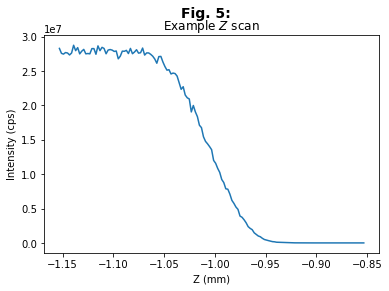

In [42]:
display(tag)
file_z = "example/ZscanSTBXRR_0014_Scan2020Jan24-124745.dat"
df_z = pd.read_csv(file_z,skiprows=800,sep='\s+')
plt.figure()
plt.plot(df_z.index.values,df_z.values)
plt.suptitle('Fig. 5:', fontsize=14, fontweight='bold')
plt.title('Example $Z$ scan')
plt.xlabel('Z (mm)')
plt.ylabel('Intensity (cps)')
plt.show()

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
One can approximate the size of the X-ray beam by looking at the $z$-scan. What is the approximate beam size of the example sample shown above?
</div>

We can acquire a more accurate beam size by fitting the $Z$-scan with an error function (technically, we will fit $\text{erfc}(Z) = \frac{1-\text{erf}(Z)}{2}$, the complimentary error function with a factor of $\frac{1}{2}$). The error function comes from the convolution of a step function with a Gaussian approximation of the beam. Here we will fit the $Z$-scan to see if your approximate beam size makes sense. Here is the function we will be fitting:
$$I(Z) = I_0\cdot\text{erfc}\Big[\frac{(Z+Z_0)}{\sigma}\Big]+\text{bkg}$$
where $I_0$ is the STB intensity, $\text{bkg}$ is the background intensity, and $\sigma$ is related to the beam size with FWHM = $2.35\cdot\sigma$). 

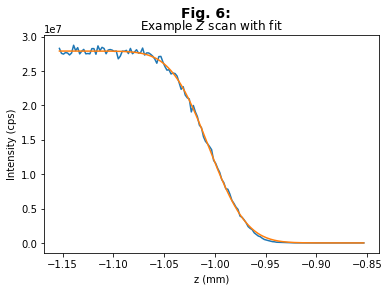

Straight through beam intensity = 27914929.15912143
Background intensity = 1.730729448645718e-11
Beam size(mm) = 0.09773037913852908


In [43]:
display(tag)

#define erf complimentary fit with extra parameters
def erfc_fit(x,I0,bkg,shift,sigma):
    return (I0)*(erfc((x+shift)/sigma)/2)+bkg

#convert data frame into lists
data_test=[]
x_values = []
for value in df_z.values:
    data_test.append(value[0])
for value in df_z.index.values:
    x_values.append(value)
    
#fit the data with initial guess
guess = [1e7,0,1,0.1]
popt, pcov = curve_fit(erfc_fit, x_values, data_test,p0=guess, bounds=((0, 0, 0, 0), (np.inf, np.inf, np.inf, np.inf)))
#print out parameters and show plot of data with fit
plt.figure()
plt.suptitle('Fig. 6:', fontsize=14, fontweight='bold')
plt.title('Example $Z$ scan with fit')
plt.xlabel('z (mm)')
plt.ylabel('Intensity (cps)')
plt.plot(x_values,data_test)
plt.plot(x_values,erfc_fit(x_values,*popt))
plt.show()
print("Straight through beam intensity = " + str(popt[0]))
print("Background intensity = " + str(popt[1]))
print("Beam size(mm) = " + str(2.35*popt[3]))

### _Important Parameters_

The cell below is place where you can record various important parameters that will come up throughout the experiment. 

Whenever you update the values, make sure to run the cell by clicking into the cell and either clicking the run button above: <img src="images/run_jupyter.png"/>
or by clicking "Shift+Enter" on your keyboard.

To test if you executed the cell, the parameters and their values will all be listed in the drop down menu below where you can click "Print Variable" to see its value.

Show the cell block's raw code by clicking the toggle button below and then input your parameter values.

In [44]:
# Here is a list of important parameters for you to fill out
display(tag)

straight_through_beam = 5e8 #cps
beam_size = 0.1 #mm

In [45]:
# selecting variables for button
button_variables = ['straight_through_beam', 'beam_size']
funcs = []
for i in button_variables:
    funcs.append(i)
 
# creating menu with them   
button_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        #print(type(globals()[button_vars.value]))
        print(globals()[button_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([button_vars,butt,outt])

## 3. Performing X-ray Reflectivity

### Follow the instructions and put a check mark in each step as you advance.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [53]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_guidance = ['Select the $\\theta/2\\theta$ axis in Manual Control. Move $\\theta/2\\theta=0.6$ deg. The goal here is to move above the critical angle and to better align for reflectivity ($\omega$ to $\\frac{1}{2}(2\\theta)$ (specular condition)).',
            'Select R$_y$ and do the following scan:[relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. You will be moving to the peak afterwards for most of these scans, so either make sure Move to Peak is checked off or manually move to the peak after the scan completes. ',
            'Perform a $\\theta/2\\theta$  scan  [absolute $0$ to $5$ deg, step$=0.02$ mm/step, speed$=5$ deg/min]. This a coarse $\\theta/2\\theta$  scan to locate fringes (i.e. high speed scan). We will perform another $\\theta/2\\theta$ scan to optimize the counts with a lower speed later.',
            'Move to the plateau of a fringe close to $2$ degrees.The idea here is to optimize the intensity for the fringes.',
            'Select the R$_y$ axis. Perform a relative R$_y$ scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min].',
            'Select the R$_x$ axis. Perform a relative R$_x$ scan  [relative -$2$ to $2$, step$=0.05$ mm/step, speed$=8$ deg/min]. Here, you are optimizing the intensity by rotating the sample in an axis $90$ deg off of the R$_y$ axis.',
            'Again, select the R$_y$ axis. Perform a relative R$_y$ scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. This repeated procedure creates better alignment and allows you to optimize the intensity of the reflectivity signal.',
            'Select the $\\theta/2\\theta$ axis. Perform a $\\theta/2\\theta$  scan  [absolute $0$ to $5$ deg, step$=0.02$, speed$=1$ deg/min].',
            'Save $\\theta/2\\theta$ scan as "2T_XRR_RIDGE.ras"',
            'Now we want to perform a background scan. This is done by offsetting the sample slightly in R$_y$. Firstly, locate your most recent R$_y$ scan',
            'Find the FWHM. Calculate double the FWHM and record that value.',
            'Select the R$_y$ axis and move R$_y$ up or down by the value you just recorded (e.g. if R$_y$ is at $1$ and $2\cdot$FWHM$=1$, move R$_y$ to $2$ or $0$). R$_y$ is now offset.',
            'Repeat the $\\theta/2\\theta$ scan and save the scan as "2T_XRR_BKG.ras". This data will need to be subtracted from your "2TW_XRR_RIDGE.ras" data when performing analysis.']


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_studio = ['Select the $\\theta/2\\theta$ axis in Pro Control. Move $\\theta/2\\theta=0.6$ deg. The goal here is to move above the critical angle and to better align for reflectivity ($\omega$ to $\\frac{1}{2}(2\\theta)$ (specular condition)).',
            'Select R$_y$ and do the following scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. Make sure you change to FWHM in peak search.',
            'Perform a $\\theta/2\\theta$  scan  [absolute $0$ to $5$ deg, step$=0.02$ mm/step, speed$=5$ deg/min]. This a coarse $\\theta/2\\theta$  scan to locate fringes (i.e. high speed scan). We will perform another $\\theta/2\\theta$ scan to optimize the counts with a lower speed later.',
            'Move to the plateau of a fringe close to $2$ degrees. To do this put the mouse to the position you want to move to. Right click and select the option "Send Position" and "To". Then click Move in the $\\theta/2\\theta$ tab. The idea here is to optimize the intensity for the fringes.',
            'Select the R$_y$ axis. Perform a relative R$_y$ scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. Make sure you change to FWHM in Peak Search.',
            'Select the R$_x$ axis. Perform a relative R$_x$ scan  [relative -$2$ to $2$, step$=0.05$ mm/step, speed$=8$ deg/min]. Here, you are optimizing the intensity by rotating the sample in an axis $90$ deg off of the R$_y$ axis.',
            'Again, select the R$_y$ axis. Perform a relative R$_y$ scan  [relative -$0.1$ to $0.1$, step$=0.005$ mm/step, speed$=0.4$ deg/min]. Make sure you change to FWHM in peak search. This repeated procedure creates better alignment and allows you to optimize the intensity of the reflectivity signal.',
            'Select the $\\theta/2\\theta$ axis. Perform a $\\theta/2\\theta$  scan  [absolute $0$ to $5$ deg, step$=0.02$, speed$=1$ deg/min].',
            'Save $\\theta/2\\theta$ scan as "2T_XRR_RIDGE.ras"',
            'Now we want to perform a background scan. This is done by offsetting the sample slightly in R$_y$. Firstly, locate your most recent R$_y$ scan',
            'Find the FWHM. Calculate double the FWHM and record that value.',
            'Select the R$_y$ axis and move R$_y$ up or down by the value you just recorded (e.g. if R$_y$ is at $1$ and $2\cdot$FWHM$=1$, move R$_y$ to $2$ or $0$). R$_y$ is now offset.',
            'Repeat the $\\theta/2\\theta$ scan and save the scan as "2T_XRR_BKG.ras". This data will need to be subtracted from your "2T_XRR_RIDGE.ras" data when performing analysis.']

if (machine_toggle_1.value):
    step_list = step_list_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list = step_list_studio
    print("Instructions for SmartLab Studio II")


checkbox_array = []
for step in step_list:
    step_index = str(step_list.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb3 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array.index(checkbox)+1))
            pb3.button_style='danger'
    if steps_completed == len(checkbox_array):
        print("You completed all the steps. Nice job!")
        pb3.button_style='success'
        
pb3.on_click(on_button_clicked)
display(pb3)

Instructions for SmartLab Guidance


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Perform a $\…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Move to the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Select the R…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Select the R…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Again, selec…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Save $\\thet…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Now we want…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Find the FW…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>12:'), HTMLMath(value='Select the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>13:'), HTMLMath(value='Repeat the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
The background scan becomes more and more important as you move to higher $\theta /2\theta$ values. Why is this the case?
</div>

Here is an example $\theta/2\theta$ background corrected scan (similar to a $\theta/2\theta$ scan, ask your supervisor for more details). Your scan should look similar.

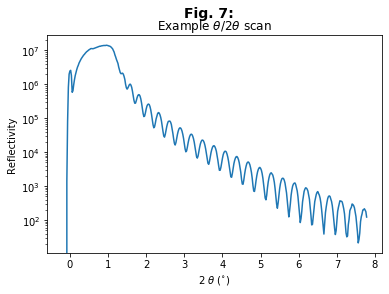

In [50]:
display(tag)
file = "example/specXRR111_Al2O3_006.dat"
file_background = "example/XRRBKGPt111_Al2O3_006.dat"
df = pd.read_csv(file,skiprows=800,sep='\s+')
df_background = pd.read_csv(file_background,skiprows=800,sep='\s+')
df_bg_corrected = df - df_background
plt.figure()
plt.suptitle('Fig. 7:', fontsize=14, fontweight='bold')
plt.title('Example $\\theta/2\\theta$ scan')
plt.plot(df_bg_corrected.index.values[:400],df_bg_corrected.values[:400])
plt.yscale('log')
plt.xlabel('2 $\\theta$ ($^{\circ}$)')
plt.ylabel('Reflectivity')
plt.show()

# 4. Finishing Measurement

Congratulations on performing an X-ray reflectivity experiment. We hope it was a good experience. It is now to complete some final steps. Always leave the Smartlab in the same state as it was before you began your experiment (e.g. X-ray source turned off, software closed, etc.).

### Follow the instructions and put a check mark in each step as you advance.

The following experiment will be performed in the *Pro/Manual Control* window of Smartlab Studio 2 software.

In [48]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_finish = ['Make sure the following motors are set to zero in the H/W Status Tab: $2\\theta$, $\omega$, $2\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro/Manual Control, put zero and click on Move.',
            'Open XG Control.',
            'Turn Off the X-Ray by clicking the Off button. There is no need to set the voltage or current to any value.',
            'In the Data Browser Window, delete all your scans so next user can start with a clean workspace. Make sure you have all the necessary scans saved.']
checkbox_array_finish = []
for step in step_list_finish:
    step_index = str(step_list_finish.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_finish.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb4 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_finish:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_finish.index(checkbox)+1))
            pb4.button_style='danger'
    if steps_completed == len(checkbox_array_finish):
        print("You are all set!")
        print("Please let us know if anything can be improved.") 
        print("You are the first people to use this Jupyter Notebook in the 461 lab course at Northwestern. Thanks!")
        pb4.button_style='success'
        
pb4.on_click(on_button_clicked)
display(pb4)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Turn Off the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='In the Data …

Button(button_style='info', description='Finish!', style=ButtonStyle())